# **EDA Ireland File**

**What this does:**
This block loads the original file, loops over 2022/23/24, and for each year pulls the relevant columns, renames them to a common schema, adds a Year column, and stacks everything into a long dataframe df. df_latest keeps only the most recent year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

#paths
FILE_PATH = "Irish_GPG_2022_2024_cleaned.csv"
OUT_DIR = Path("figs_eda")
OUT_DIR.mkdir(exist_ok=True)

# load wide data
wide = pd.read_csv(FILE_PATH)

# build long table (one row per employer-year)
years = [2022, 2023, 2024]
records = []

for year in years:
    # only keep rows where that year actually reported
    mask = wide[f"{year}_ReportYear"].notna()

    temp = pd.DataFrame({
        "Year": wide.loc[mask, f"{year}_ReportYear"].astype(int),
        "EmployerName": wide.loc[mask, "EmployerName"],

        "DiffMeanHourlyPercent":   wide.loc[mask, f"{year}_DiffMeanHourlyPercent"],
        "DiffMedianHourlyPercent": wide.loc[mask, f"{year}_DiffMedianHourlyPercent"],

        "DiffMeanBonusPercent":    wide.loc[mask, f"{year}_DiffMeanBonusPercent"],
        "DiffMedianBonusPercent":  wide.loc[mask, f"{year}_DiffMedianBonusPercent"],

        "FemaleTopQuartileShare":  wide.loc[mask, f"{year}_FemaleTopQuartile"],
        "MaleTopQuartileShare":    wide.loc[mask, f"{year}_MaleTopQuartile"],

        "FemaleBonusEligibilityPercent": wide.loc[mask, f"{year}_FemaleBonusPercent"],
        "MaleBonusEligibilityPercent":   wide.loc[mask, f"{year}_MaleBonusPercent"],
    })

    records.append(temp)

df = pd.concat(records, ignore_index=True)

YEAR_COL = "Year"
latest_year = int(df[YEAR_COL].max())
df_latest = df[df[YEAR_COL] == latest_year].copy()

print("Years present:", df[YEAR_COL].unique())
print("Latest year:", latest_year)
df.head()


Years present: [2022 2023 2024]
Latest year: 2024


,Year,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,FemaleTopQuartileShare,MaleTopQuartileShare,FemaleBonusEligibilityPercent,MaleBonusEligibilityPercent
0,2022,3M,7.4,2.0,20.0,-45.0,29.0,71.0,9.0,14.0
1,2022,A&L Goodbody (Excluding Equity Partners),20.9,22.7,41.6,35.1,57.9,42.1,54.7,62.8
2,2022,Aa,6.0,16.0,-36.0,-51.0,27.0,73.0,76.0,80.0
3,2022,Abm,3.9,1.7,23.1,-17.3,64.0,36.0,2.8,3.7
4,2022,Abp Food Group: Abp Ireland,18.4,8.3,81.7,0.0,17.0,83.0,83.0,86.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           2209 non-null   int64  
 1   EmployerName                   2209 non-null   object 
 2   DiffMeanHourlyPercent          2205 non-null   float64
 3   DiffMedianHourlyPercent        2200 non-null   float64
 4   DiffMeanBonusPercent           1629 non-null   float64
 5   DiffMedianBonusPercent         1616 non-null   float64
 6   FemaleTopQuartileShare         2135 non-null   float64
 7   MaleTopQuartileShare           2135 non-null   float64
 8   FemaleBonusEligibilityPercent  1745 non-null   float64
 9   MaleBonusEligibilityPercent    1745 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 172.7+ KB


**Overall missingness by column (counts + %)**

In [3]:
# Count of missing values per column
missing_count = df.isna().sum()

# Percentage of missing values per column
missing_pct = df.isna().mean() * 100

missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct.round(2)
})

print(missing_summary)


                               missing_count  missing_pct
Year                                       0         0.00
EmployerName                               0         0.00
DiffMeanHourlyPercent                      4         0.18
DiffMedianHourlyPercent                    9         0.41
DiffMeanBonusPercent                     580        26.26
DiffMedianBonusPercent                   593        26.84
FemaleTopQuartileShare                    74         3.35
MaleTopQuartileShare                      74         3.35
FemaleBonusEligibilityPercent            464        21.00
MaleBonusEligibilityPercent              464        21.00


**Missingness by year and column**

In [4]:
# Missingness per year for each numeric column
missing_by_year = (
    df
    .groupby("Year")
    .apply(lambda x: x.isna().mean() * 100)
    .round(2)
)

print(missing_by_year)

      Year  EmployerName  DiffMeanHourlyPercent  DiffMedianHourlyPercent  \
Year                                                                       
2022   0.0           0.0                   0.15                     0.29   
2023   0.0           0.0                   0.29                     0.14   
2024   0.0           0.0                   0.12                     0.72   

      DiffMeanBonusPercent  DiffMedianBonusPercent  FemaleTopQuartileShare  \
Year                                                                         
2022                 25.92                   26.22                    3.83   
2023                 25.14                   26.16                    2.46   
2024                 27.45                   27.92                    3.70   

      MaleTopQuartileShare  FemaleBonusEligibilityPercent  \
Year                                                        
2022                  3.83                          21.21   
2023                  2.46                   

/tmp/ipython-input-2455526862.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().mean() * 100)


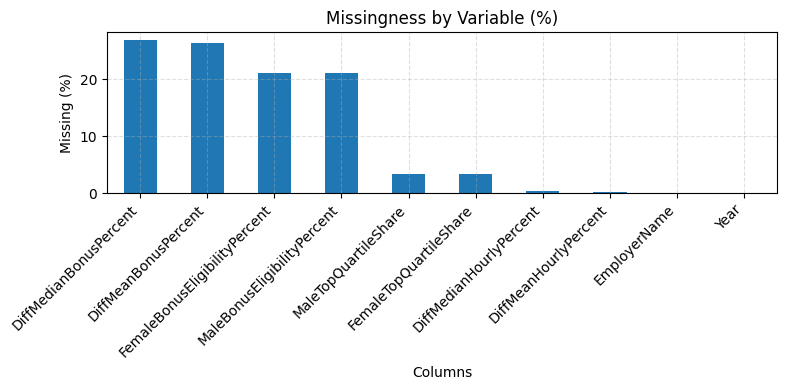

In [5]:
# Missingness summary
missing_summary = (
    df.isna()
      .mean()
      .mul(100)
      .round(2)
      .sort_values(ascending=False)
)

# Bar chart
plt.figure(figsize=(8,4))
missing_summary.plot(kind="bar", color="#1f77b4")

plt.title("Missingness by Variable (%)")
plt.ylabel("Missing (%)")
plt.xlabel("Columns")

plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.savefig(OUT_DIR / "missingness_bar_chart.png", dpi=180)
plt.show()


**Record count per year (bar):** Count how many employers reported in each year.

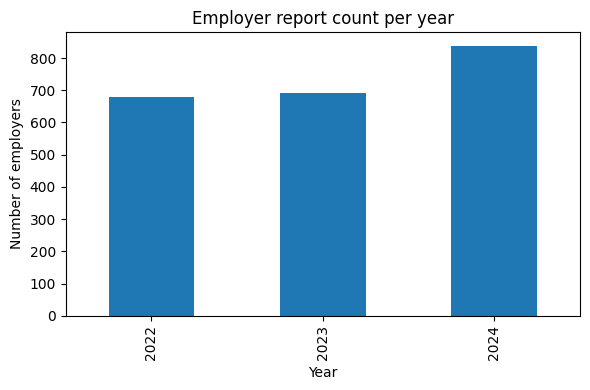

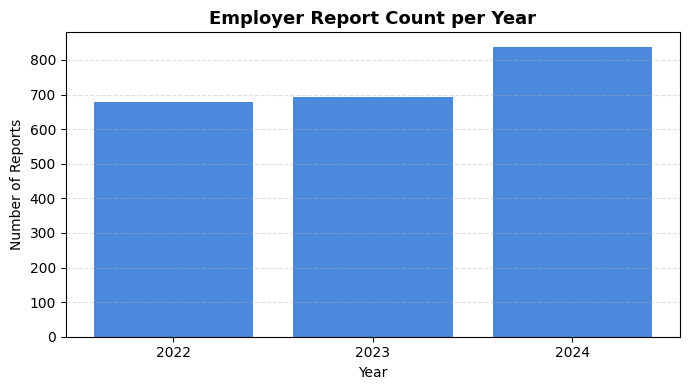

In [6]:
count_by_year = (
    df
    .groupby(YEAR_COL)
    .size()
    .sort_index()
)

plt.figure(figsize=(6,4))
count_by_year.plot(kind="bar")
plt.title("Employer report count per year")
plt.xlabel("Year")
plt.ylabel("Number of employers")
plt.tight_layout()
plt.savefig(OUT_DIR / "01_record_count_per_year.png", dpi=180)
plt.show()

#viz for presentation
plt.figure(figsize=(7,4))
plt.bar(count_by_year.index.astype(str), count_by_year.values, color="#4B89DC")
plt.title("Employer Report Count per Year", fontsize=13, weight="bold")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

**Mean DiffMeanHourlyPercent per year (line):** Average mean hourly pay gap for each year.

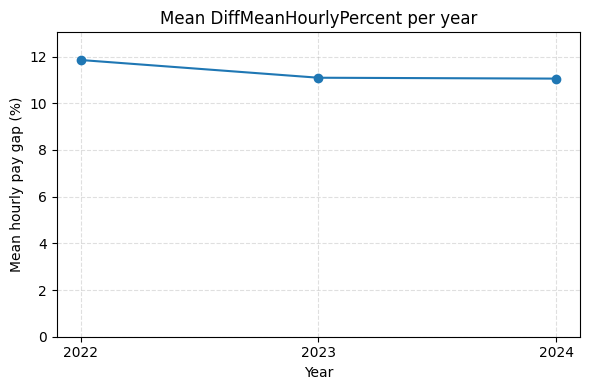

In [7]:
mean_hourly_by_year = (
    df
    .groupby(YEAR_COL)["DiffMeanHourlyPercent"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(6,4))

#Plot using categorical x-axis so there would be no weird decimals
plt.plot(
    mean_hourly_by_year.index.astype(str),   # convert years to string
    mean_hourly_by_year.values,
    marker="o"
)

plt.title("Mean DiffMeanHourlyPercent per year")
plt.xlabel("Year")
plt.ylabel("Mean hourly pay gap (%)")

# Start y-axis at 0 (feedback)
plt.ylim(0, mean_hourly_by_year.max() * 1.1)

plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_DIR / "02_mean_diff_mean_hourly_per_year.png", dpi=180)
plt.show()


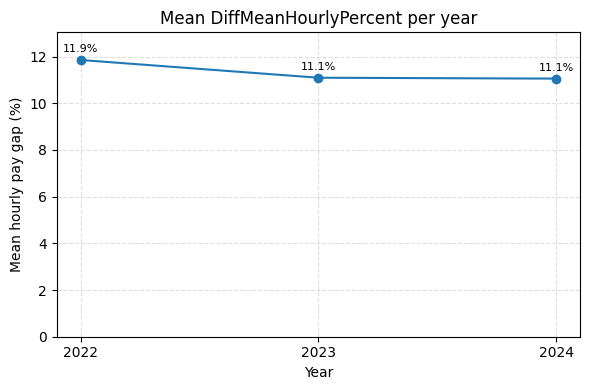

In [8]:
mean_hourly_by_year = (
    df
    .groupby(YEAR_COL)["DiffMeanHourlyPercent"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(6,4))

years = mean_hourly_by_year.index.astype(str)
values = mean_hourly_by_year.values

# Plot
plt.plot(years, values, marker="o")

plt.title("Mean DiffMeanHourlyPercent per year")
plt.xlabel("Year")
plt.ylabel("Mean hourly pay gap (%)")

# Start y-axis at 0
plt.ylim(0, mean_hourly_by_year.max() * 1.1)

plt.grid(True, linestyle="--", alpha=0.4)

# === ADD LABELS ABOVE EACH POINT ===
for x, y in zip(years, values):
    plt.text(
        x, y + (mean_hourly_by_year.max() * 0.02),  # small vertical offset
        f"{y:.1f}%",                                # format label
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.savefig(OUT_DIR / "02_mean_diff_mean_hourly_per_year.png", dpi=180)
plt.show()


**Distribution of DiffMeanHourlyPercent – latest year (hist):** Histogram of hourly pay gaps for the most recent reporting year.

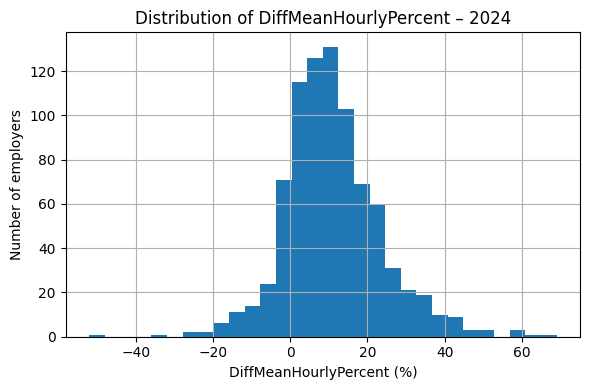

In [8]:
plt.figure(figsize=(6,4))
df_latest["DiffMeanHourlyPercent"].dropna().hist(bins=30)
plt.title(f"Distribution of DiffMeanHourlyPercent – {latest_year}")
plt.xlabel("DiffMeanHourlyPercent (%)")
plt.ylabel("Number of employers")
plt.tight_layout()
plt.savefig(OUT_DIR / "03_hist_diff_mean_hourly_latest_year.png", dpi=180)
plt.show()


**Boxplot of DiffMedianHourlyPercent by year:** Show spread + outliers of median hourly gap for each year.

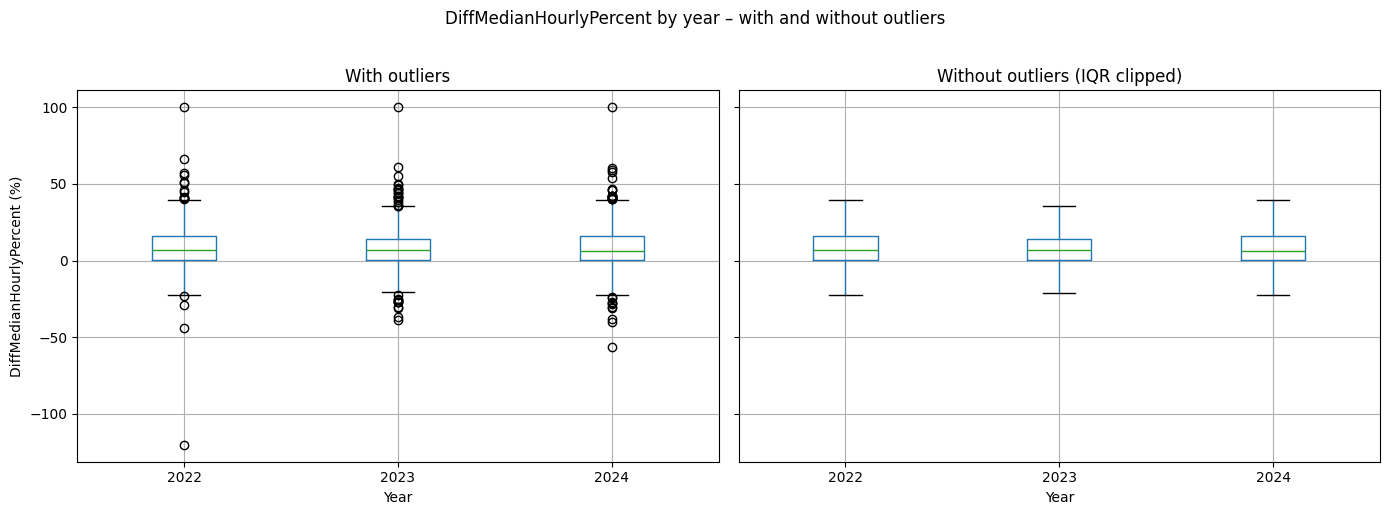

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#making a copy so that we can modify for the "no-outliers" version
df_no_outliers = df.copy()

# IQR clipping per year
for year in df_no_outliers[YEAR_COL].unique():
    mask = df_no_outliers[YEAR_COL] == year
    vals = df_no_outliers.loc[mask, "DiffMedianHourlyPercent"]

    q1 = vals.quantile(0.25)
    q3 = vals.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    df_no_outliers.loc[mask, "DiffMedianHourlyPercent"] = vals.clip(lower=lower, upper=upper)

# shared figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# 1) WITH outliers
df.boxplot(
    column="DiffMedianHourlyPercent",
    by=YEAR_COL,
    ax=axes[0]
)
axes[0].set_title("With outliers")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("DiffMedianHourlyPercent (%)")

# 2) WITHOUT outliers (clipped)
df_no_outliers.boxplot(
    column="DiffMedianHourlyPercent",
    by=YEAR_COL,
    ax=axes[1]
)
axes[1].set_title("Without outliers (IQR clipped)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("")

# overall figure title (optional)
fig.suptitle("DiffMedianHourlyPercent by year – with and without outliers", y=1.02)

plt.tight_layout()
plt.savefig(OUT_DIR / "04_boxplots_with_and_without_outliers.png", dpi=180)
plt.show()


**Mean DiffMeanBonusPercent per year (line):** Average mean bonus gap per year.

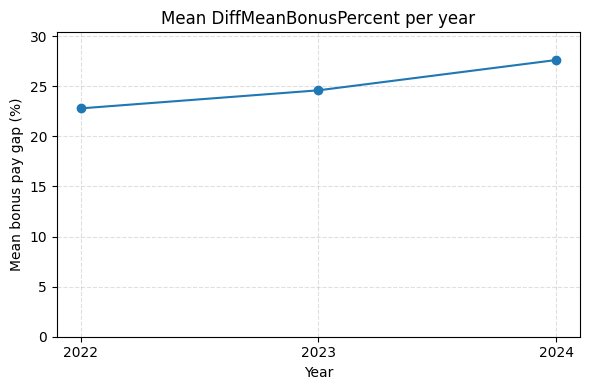

In [10]:
mean_bonus_by_year = (
    df
    .groupby(YEAR_COL)["DiffMeanBonusPercent"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(6,4))

# Plot using categorical x-axis to avoid float year labels
plt.plot(
    mean_bonus_by_year.index.astype(str),
    mean_bonus_by_year.values,
    marker="o"
)

plt.title("Mean DiffMeanBonusPercent per year")
plt.xlabel("Year")
plt.ylabel("Mean bonus pay gap (%)")

# Force y-axis to start at 0
plt.ylim(0, mean_bonus_by_year.max() * 1.1)

plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_DIR / "05_mean_diff_mean_bonus_per_year.png", dpi=180)
plt.show()


**Distribution of DiffMeanBonusPercent:** Histogram of bonus pay gaps for the latest year.

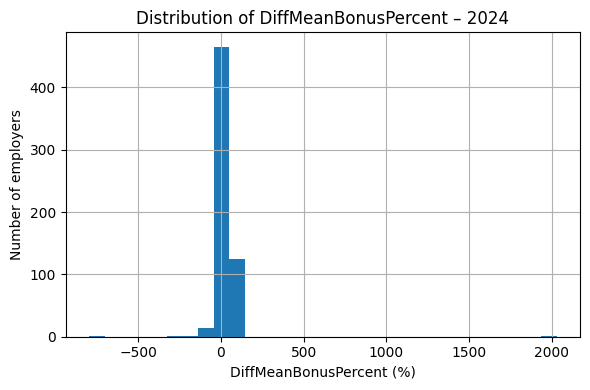

In [11]:
plt.figure(figsize=(6,4))
df_latest["DiffMeanBonusPercent"].dropna().hist(bins=30)
plt.title(f"Distribution of DiffMeanBonusPercent – {latest_year}")
plt.xlabel("DiffMeanBonusPercent (%)")
plt.ylabel("Number of employers")
plt.tight_layout()
plt.savefig(OUT_DIR / "06_hist_diff_mean_bonus_latest_year.png", dpi=180)
plt.show()


**Employer size distribution – latest year (bar)**

The current CSV does not contain an employer size column (nothing like EmployerSize or EmployerSize_Final), so we can only add placeholder logic that won’t crash.
This will safely skip the plot until you add an employer-size column.

In [12]:
if "EmployerSize_Final" in df_latest.columns:
    plt.figure(figsize=(6,4))
    (
        df_latest["EmployerSize_Final"]
        .value_counts()
        .sort_index()
        .plot(kind="bar")
    )
    plt.title(f"Employer size distribution – {latest_year}")
    plt.xlabel("Employer size band")
    plt.ylabel("Number of employers")
    plt.tight_layout()
    plt.savefig(OUT_DIR / "07_employer_size_distribution_latest_year.png", dpi=180)
    plt.show()
else:
    print("EmployerSize_Final not found in data – skipping employer size distribution plot.")

EmployerSize_Final not found in data – skipping employer size distribution plot.


**Late submission rate per year (bar)**

Same situation: there is no late-submission flag column in the CSV. When/if we add a 0/1 late flag, this will show % of late reporters by year.

In [13]:
if "LateSubmissionFlag" in df.columns:
    late_rate_by_year = (
        df
        .groupby(YEAR_COL)["LateSubmissionFlag"]
        .mean()
        .sort_index()
        * 100
    )

    plt.figure(figsize=(6,4))
    late_rate_by_year.plot(kind="bar")
    plt.title("Late submission rate per year")
    plt.xlabel("Year")
    plt.ylabel("Late submissions (%)")
    plt.tight_layout()
    plt.savefig(OUT_DIR / "08_late_submission_rate_per_year.png", dpi=180)
    plt.show()
else:
    print("LateSubmissionFlag not found in data – skipping late submission rate plot.")

LateSubmissionFlag not found in data – skipping late submission rate plot.


**DiffMeanHourlyPercent vs DiffMedianHourlyPercent – latest year:** See how mean and median hourly gaps relate for each employer in the latest year.

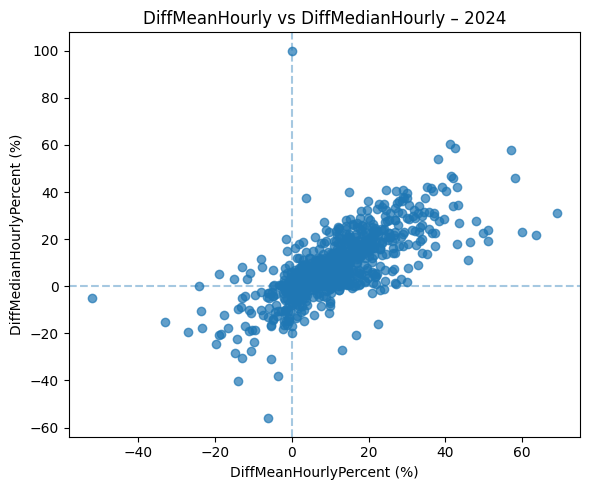

In [14]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_latest["DiffMeanHourlyPercent"],
    df_latest["DiffMedianHourlyPercent"],
    alpha=0.7
)
plt.title(f"DiffMeanHourly vs DiffMedianHourly – {latest_year}")
plt.xlabel("DiffMeanHourlyPercent (%)")
plt.ylabel("DiffMedianHourlyPercent (%)")
plt.axhline(0, linestyle="--", alpha=0.4)
plt.axvline(0, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_DIR / "09_scatter_hourly_vs_median_latest_year.png", dpi=180)
plt.show()

**Female top quartile share (avg) over time (line):**
Tracks average female representation in the top pay quartile over years.

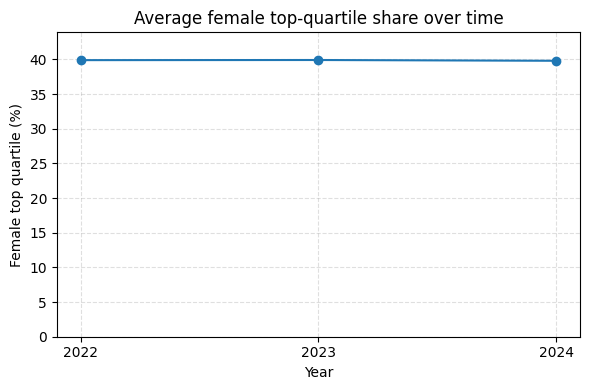

In [15]:
female_topq_by_year = (
    df
    .groupby(YEAR_COL)["FemaleTopQuartileShare"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(6,4))

# Use categorical x-axis (string years)
plt.plot(
    female_topq_by_year.index.astype(str),
    female_topq_by_year.values,
    marker="o"
)

plt.title("Average female top-quartile share over time")
plt.xlabel("Year")
plt.ylabel("Female top quartile (%)")

# Start y-axis at 0
plt.ylim(0, female_topq_by_year.max() * 1.1)

plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_DIR / "10_female_top_quartile_share_over_time.png", dpi=180)
plt.show()


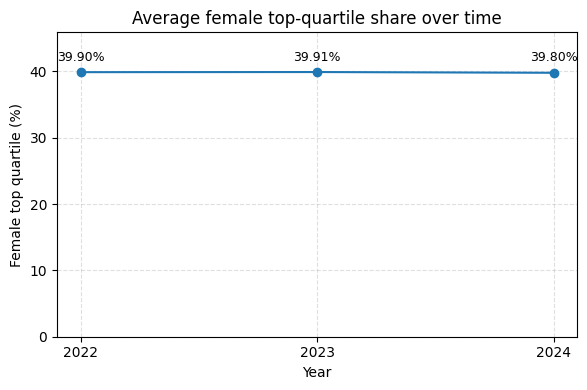

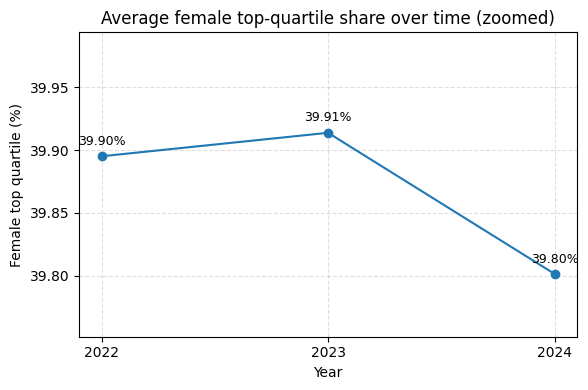

In [19]:
female_topq_by_year = (
    df
    .groupby(YEAR_COL)["FemaleTopQuartileShare"]
    .mean()
    .sort_index()
)

years = female_topq_by_year.index.astype(str)
values = female_topq_by_year.values
# 1) Broad view

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(years, values, marker="o")

ax.set_title("Average female top-quartile share over time")
ax.set_xlabel("Year")
ax.set_ylabel("Female top quartile (%)")

# a bit more headroom for labels
ax.set_ylim(0, values.max() * 1.15)

ax.grid(True, linestyle="--", alpha=0.4)

# labels with offset in points (so they don't sit on the line)
for x, y in zip(years, values):
    ax.annotate(
        f"{y:.2f}%",
        (x, y),
        xytext=(0, 6),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9,
    )

fig.tight_layout()
fig.savefig(OUT_DIR / "10_female_topq_share_over_time_broad.png", dpi=180)
plt.show()

# 2) Zoomed-in view

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(years, values, marker="o")

ax.set_title("Average female top-quartile share over time (zoomed)")
ax.set_xlabel("Year")
ax.set_ylabel("Female top quartile (%)")

margin = 0.05
low = values.min() - margin
high = values.max() + margin + 0.03   # extra for labels
ax.set_ylim(low, high)

ax.grid(True, linestyle="--", alpha=0.4)

for x, y in zip(years, values):
    ax.annotate(
        f"{y:.2f}%",
        (x, y),
        xytext=(0, 6),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9,
    )

fig.tight_layout()
fig.savefig(OUT_DIR / "10_female_topq_share_over_time_zoomed.png", dpi=180)
plt.show()


**Bonus eligibility: Male vs Female % over time (line):** Compares average % of men vs women eligible for bonuses by year.

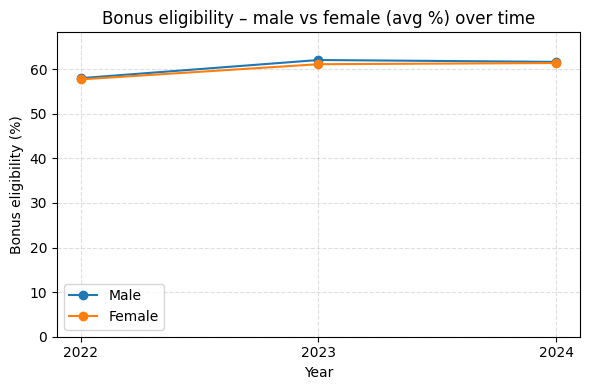

In [20]:
bonus_elig_by_year = (
    df
    .groupby(YEAR_COL)[["MaleBonusEligibilityPercent",
                        "FemaleBonusEligibilityPercent"]]
    .mean()
    .sort_index()
)

plt.figure(figsize=(6,4))

# Convert x-axis to categorical so no decimals
x = bonus_elig_by_year.index.astype(str)

plt.plot(
    x,
    bonus_elig_by_year["MaleBonusEligibilityPercent"],
    marker="o",
    label="Male"
)
plt.plot(
    x,
    bonus_elig_by_year["FemaleBonusEligibilityPercent"],
    marker="o",
    label="Female"
)

plt.title("Bonus eligibility – male vs female (avg %) over time")
plt.xlabel("Year")
plt.ylabel("Bonus eligibility (%)")

# Start from 0 for clean comparison
plt.ylim(0, bonus_elig_by_year.max().max() * 1.1)

plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_DIR / "11_bonus_eligibility_male_vs_female_over_time.png", dpi=180)
plt.show()


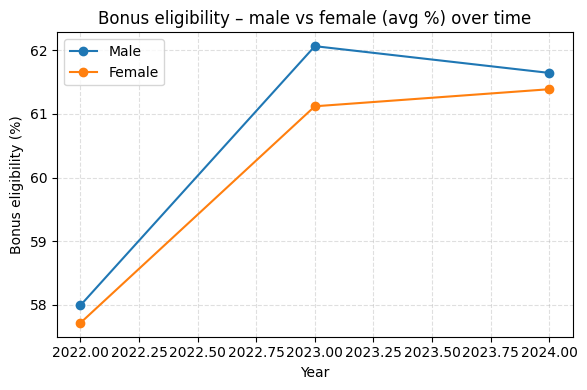

In [ ]:
bonus_elig_by_year = (
    df
    .groupby(YEAR_COL)[["MaleBonusEligibilityPercent",
                        "FemaleBonusEligibilityPercent"]]
    .mean()
    .sort_index()
)

plt.figure(figsize=(6,4))
plt.plot(
    bonus_elig_by_year.index,
    bonus_elig_by_year["MaleBonusEligibilityPercent"],
    marker="o",
    label="Male"
)
plt.plot(
    bonus_elig_by_year.index,
    bonus_elig_by_year["FemaleBonusEligibilityPercent"],
    marker="o",
    label="Female"
)
plt.title("Bonus eligibility – male vs female (avg %) over time")
plt.xlabel("Year")
plt.ylabel("Bonus eligibility (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_DIR / "11_bonus_eligibility_male_vs_female_over_time.png", dpi=180)
plt.show()

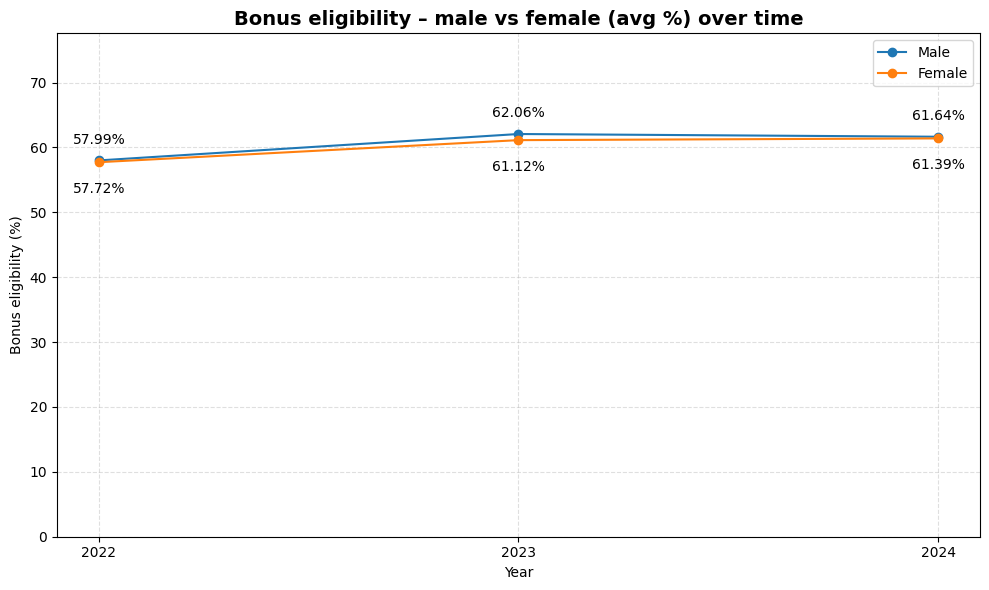

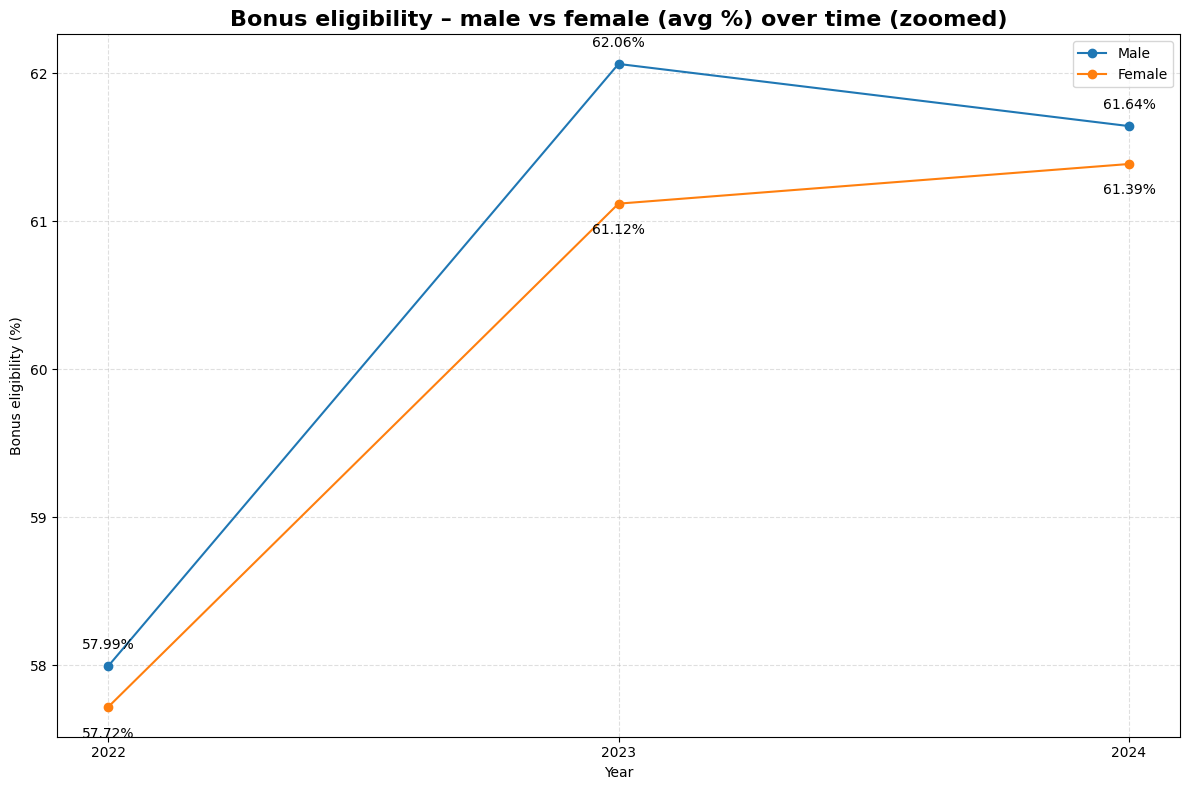

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Compute yearly averages
bonus_elig_by_year = (
    df
    .groupby(YEAR_COL)[[
        "MaleBonusEligibilityPercent",
        "FemaleBonusEligibilityPercent"
    ]]
    .mean()
    .sort_index()
)

years = bonus_elig_by_year.index.astype(str)
male = bonus_elig_by_year["MaleBonusEligibilityPercent"].values
female = bonus_elig_by_year["FemaleBonusEligibilityPercent"].values

# 2) CHART 1 — Broad View
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(years, male, marker="o", label="Male")
ax.plot(years, female, marker="o", label="Female")

ax.set_title("Bonus eligibility – male vs female (avg %) over time", fontweight="bold", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Bonus eligibility (%)")

ax.set_ylim(0, max(male.max(), female.max()) * 1.25)

ax.legend()
ax.grid(True, linestyle="--", alpha=0.4)

# Labels (black, non-overlapping)
for x, y in zip(years, male):
    ax.annotate(
        f"{y:.2f}%", (x, y),
        xytext=(0, 10), textcoords="offset points",
        ha="center", va="bottom", fontsize=10, color="black"
    )

for x, y in zip(years, female):
    ax.annotate(
        f"{y:.2f}%", (x, y),
        xytext=(0, -14), textcoords="offset points",
        ha="center", va="top", fontsize=10, color="black"
    )

fig.tight_layout()
fig.savefig(OUT_DIR / "11_bonus_eligibility_male_vs_female_over_time_broad.png", dpi=180)
plt.show()

# 3) CHART 2 — Zoomed View
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(years, male, marker="o", label="Male")
ax.plot(years, female, marker="o", label="Female")

ax.set_title("Bonus eligibility – male vs female (avg %) over time (zoomed)", fontweight="bold", fontsize=16)
ax.set_xlabel("Year")
ax.set_ylabel("Bonus eligibility (%)")

all_vals = np.concatenate([male, female])
margin = 0.2
ax.set_ylim(all_vals.min() - margin, all_vals.max() + margin)

ax.legend()
ax.grid(True, linestyle="--", alpha=0.4)

# Labels
for x, y in zip(years, male):
    ax.annotate(
        f"{y:.2f}%", (x, y),
        xytext=(0, 10), textcoords="offset points",
        ha="center", va="bottom", fontsize=10, color="black"
    )

for x, y in zip(years, female):
    ax.annotate(
        f"{y:.2f}%", (x, y),
        xytext=(0, -14), textcoords="offset points",
        ha="center", va="top", fontsize=10, color="black"
    )

fig.tight_layout()
fig.savefig(OUT_DIR / "11_bonus_eligibility_male_vs_female_over_time_zoomed.png", dpi=180)
plt.show()


**Correlation matrix of numeric fields – latest year (imshow):** Shows how all numeric variables for the latest year move together (–1 = strong negative, +1 = strong positive).

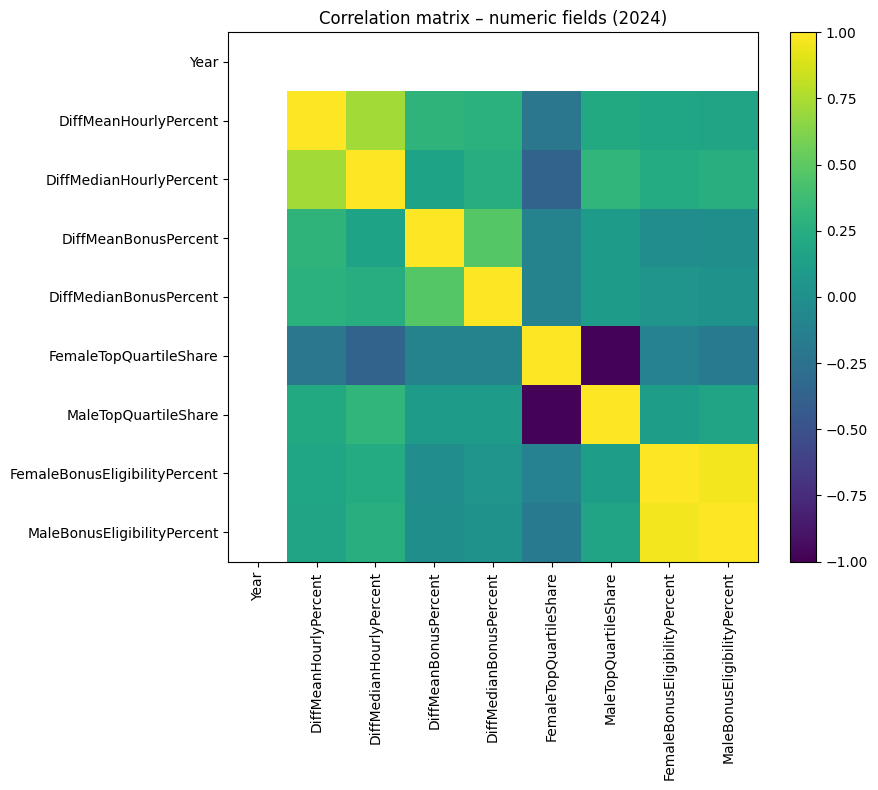

In [ ]:
numeric_latest = df_latest.select_dtypes(include="number").copy()
corr = numeric_latest.corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title(f"Correlation matrix – numeric fields ({latest_year})")
plt.tight_layout()
plt.savefig(OUT_DIR / "12_corr_matrix_latest_year.png", dpi=180)
plt.show()